# Feature-Selection Tecniques

Its method to choose a subset of relevant and informative features from a actual dataset.
1. To reduce the dimensionality of feature space.
2. To speed up a learning algorithm.
3. To improve the predictive accuracy of a classification algorithm.
4. To avoid overfitting

#### Filter method 

a) Pearson Correlation: Measures the linear correlation between each feature and the target variable. Features with high correlation values are more likely to be relevant.
b) Mutual Information: Measures the amount of information shared between a feature and the target variable. Higher mutual information indicates more relevance.

#in which values line between (-1,1) it should be close to -1 or +1 which indicates that feature is much needed

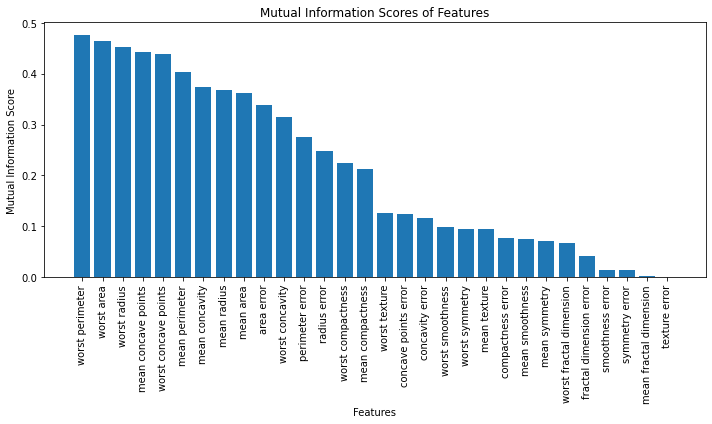

Selected features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']
[ 0  2  3  6  7 13 20 22 23 27]


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

# Feature selection using SelectKBest with mutual information
k = 10  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the scores of the features
scores = selector.scores_

# Create a DataFrame to visualize the scores of all features
features_df = pd.DataFrame(data={'Feature': data.feature_names, 'Mutual_Info_Score': scores})
features_df = features_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Plot the mutual information scores of features
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Mutual_Info_Score'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores of Features')
plt.tight_layout()
plt.show()

# Print the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_feature_indices]
print("Selected features:", selected_feature_names)
print(selected_feature_indices)


In [7]:
features_df

,Feature,Mutual_Info_Score
22,worst perimeter,0.476941
23,worst area,0.464235
20,worst radius,0.452247
7,mean concave points,0.441677
27,worst concave points,0.437991
2,mean perimeter,0.404105
6,mean concavity,0.374724
0,mean radius,0.368479
3,mean area,0.362289
13,area error,0.338897


#### Chi-squared test 

So,Chi-squared test is from hypothesis testing  is found from observed value and expected value.When two feature is independent ,if the observed count is close to the expected count the value will be smaller.So higher the value gives the feature importance.

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0: malignant, 1: benign)

# Perform feature selection using mutual information
num_features_to_select = 10
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

print("Selected Feature Indices:", selected_feature_indices)


Selected Feature Indices: [ 0  2  3  6  7 13 20 22 23 27]


#### L1 Regularization (Lasso) 

L1 regularization, known as Lasso (Least Absolute Shrinkage and Selection Operator), is a regularization technique used in linear regression and related models to prevent overfitting and perform feature selection. It adds a penalty term to the loss function that encourages the model to have as many coefficients as possible equal to zero, effectively leading feature selection. This means that Lasso tends to force some of the coefficients to exactly zero, thus excluding those features from the model.Higher values of λ lead to more coefficients being shrunk towards zero, effectively performing feature selection.

Loss=MSE+λ∑ 
p
​
 ∣β 
​
 ∣      #Lambda is controlled by lasso

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LassoCV

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0: malignant, 1: benign)

# Perform feature selection using Lasso (L1 regularization) and obtain lambda values
alphas = np.logspace(-6, 2, 100)  # Range of alpha values for LassoCV #alphas means lambda
lasso = LassoCV(alphas=alphas, cv=5)#its divided into 5 subsets #iteration
lasso.fit(X, y)

# Select the top 10 features with the corresponding lambda values
selected_feature_indices = np.argsort(np.abs(lasso.coef_))[-10:]
selected_lambda_values = lasso.alphas_[np.argsort(np.abs(lasso.coef_))][-10:]

print("Selected Feature Indices:", selected_feature_indices)
print("Corresponding Lambda Values:", selected_lambda_values)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015519012172340751, tolerance: 0.009842637362637364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0280390512125237, tolerance: 0.009842637362637364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8789641218403261, tolerance: 0.009842637362637364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

Selected Feature Indices: [26 10 28 29  6  7 27 16  5 24]
Corresponding Lambda Values: [ 0.7924829  15.55676144  0.54622772  0.45348785 32.74549163 27.18588243
  0.65793322  5.09413801 39.44206059  1.149757  ]


#### PCA 

Feature Selection: In feature selection, you choose a subset of the original features to include in the model while excluding others. The focus is on retaining the most informative and relevant features for the task. Feature selection methods like L1 regularization (Lasso), mutual information, and chi-squared tests aim to identify the subset of features that contribute the most to the target variable.

Feature Extraction (PCA): In feature extraction, you transform the original features into a new set of uncorrelated features (principal components) using techniques like Principal Component Analysis (PCA). The goal is to represent the data in a lower-dimensional space while retaining as much variance as possible. PCA is not concerned with selecting specific features; rather, it creates new features that are linear combinations of the original ones.

#### fisher_score  

Fisher Score= 

(mean 
1
​
 −mean 
2
​
 )
 ^2
 /
​
(variance 
1
​
 +variance 
2
​
 )

Higher Fisher Score values indicate that the means of the feature for different classes are far apart, and the variance within each class is small relative to the separation between means. This implies that the feature is discriminatory and can help distinguish between classes.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Calculate Fisher Score for each feature
def calculate_fisher_score(X, y):
    class_means = [np.mean(X[y == c], axis=0) for c in np.unique(y)]
    class_variances = [np.var(X[y == c], axis=0) for c in np.unique(y)]
    
    fisher_scores = []
    for feature_idx in range(X.shape[1]):
        score = ((class_means[0][feature_idx] - class_means[1][feature_idx])**2) / \
                (class_variances[0][feature_idx] + class_variances[1][feature_idx])
        fisher_scores.append(score)
    
    return fisher_scores

fisher_scores = calculate_fisher_score(X, y)
print("Fisher Scores:", fisher_scores)


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fisher Scores: [2.2590031028970845, 1.8244197609937827, 31.830099692627925, 23.70346285156885]


In [6]:
X=data.data
y=data.target
for c in np.unique(y):
    print(np.mean(X[y==c],axis=0))

[5.006 3.428 1.462 0.246]
[5.936 2.77  4.26  1.326]
[6.588 2.974 5.552 2.026]


In [13]:
X.shape[1]

4

#### Correlation coefficient 

Correlation Close to +1: When the correlation coefficient is close to +1, it indicates a strong positive linear relationship between the two features. As one feature increases, the other tends to increase as well.

Correlation Close to -1: Similarly, a correlation coefficient close to -1 suggests a strong negative linear relationship between the two features. As one feature increases, the other tends to decrease.

Correlation Close to 0: When the correlation coefficient is close to 0, it indicates a weak or no linear relationship between the two features. Changes in one feature do not necessarily predict changes in the other.

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


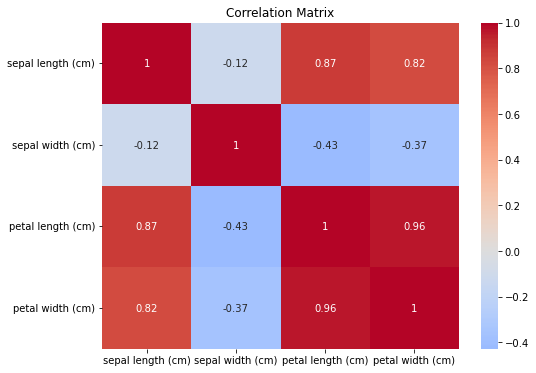

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=feature_names)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Variance threshold 

Calculate Variance: Compute the variance for each feature across all samples in the dataset. Variance measures how much the values of a feature spread out. Features with low variance have values that don't vary much from sample to sample.

Threshold Setting: Choose a threshold value for the minimum acceptable variance. Features with variance below this threshold are considered low-variance features.

Feature Selection: Remove features with variance below the threshold. These low-variance features are considered less informative and might introduce noise to the model.

In [4]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Initialize the VarianceThreshold object
threshold = 0.8  # Set the threshold value
selector = VarianceThreshold(threshold)

# Fit the selector to the data and transform the data
X_new = selector.fit_transform(X)

# Print the number of selected features and the selected features
print(f"Number of selected features: {X_new.shape[1]}")
print(f"Selected features: {selector.get_support(indices=True)}")


Number of selected features: 1
Selected features: [2]


#### Mean absolute difference(MAD) 

It provides a measure of the variability or dispersion of the data points around the mean. Features with higher MAD have greater variability around the mean,it considerd as most relevant and informative

MAD = Σ(|xi - μ|) / n

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Calculate the MAD for each feature
central_value = np.median(X, axis=0)  # You can use mean instead of median if desired
absolute_diff = np.abs(X - central_value)
mad_per_feature = np.mean(absolute_diff, axis=0)

# Rank features based on MAD
feature_indices_sorted_by_mad = np.argsort(mad_per_feature)[::-1]

# Choose top k features using SelectKBest
num_features_to_select = 2
selected_feature_indices = feature_indices_sorted_by_mad[:num_features_to_select]
selected_feature_names = [iris.feature_names[i] for i in selected_feature_indices]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: ['petal length (cm)', 'sepal length (cm)']


In [17]:
iris = load_iris()
X = iris.data
y = iris.target
central_value = np.median(X, axis=0)
central_value

array([5.8 , 3.  , 4.35, 1.3 ])

#### Tree-Based 

In [ ]:
#by using impurity score like gini,entropy and many more techniques it calculated and finding out the feature_importance

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the ranked features and their importance scores
print("Ranked Features:")
for idx in sorted_indices:
    print(f"Feature: {iris.feature_names[idx]}, Importance: {feature_importances[idx]:.4f}")


Ranked Features:
Feature: petal length (cm), Importance: 0.4361
Feature: petal width (cm), Importance: 0.4361
Feature: sepal length (cm), Importance: 0.1061
Feature: sepal width (cm), Importance: 0.0217


In [24]:
iris = load_iris()
X = iris.data
y = iris.target
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X,y)
clf.feature_importances_

array([0.10612762, 0.02167809, 0.43612951, 0.43606478])

#### KNN 

KNN measure the feature importance based on how often a feature is chosen in top k neighbors.Features that is consistently at top k neighbors across many data points might be considered more important and informative. 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
url = "https://web.stanford.edu/class/
archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# Drop rows with missing values for simplicity
data = data.dropna(subset=['Age', 'Fare', 'Pclass', 'Sex'])

# Convert categorical variables to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features and target variable
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model with all features
knn_all_features = KNeighborsClassifier()
knn_all_features.fit(X_train, y_train)
y_pred_all_features = knn_all_features.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)

print("Accuracy with all features:", accuracy_all_features)

# Perform feature selection using KNN
best_accuracy = 0#initialization as 0
best_feature_indices = []

for feature_idx in range(X.shape[1]):
    selected_feature_indices = [idx for idx in range(X.shape[1]) if idx != feature_idx]
    X_selected = X_train.iloc[:, selected_feature_indices]
    X_test_selected = X_test.iloc[:, selected_feature_indices]

    knn_selected_features = KNeighborsClassifier()
    knn_selected_features.fit(X_selected, y_train)
    y_pred_selected_features = knn_selected_features.predict(X_test_selected)
    accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)

    if accuracy_selected_features > best_accuracy:
        best_accuracy = accuracy_selected_features
        best_feature_indices = selected_feature_indices

print("Best accuracy:", best_accuracy)
print("Best feature indices:", best_feature_indices)

Accuracy with all features: 0.6853932584269663
Best accuracy: 0.7640449438202247
Best feature indices: [0, 1, 2]


### Feature selection techniques in ML and DL how to deal with it: 

In [ ]:
ML-
DL-